In [3]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from operator import itemgetter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
import seaborn as sns
from sklearn import linear_model, preprocessing

In [4]:
# Import the datasets

rookieDf = pd.read_csv('2017-rookies.csv')
pastDf = pd.read_csv('historical-rookies.csv')

# Preview the historical dataset

pastDf.head()

,SeasonID,Player,Season,Age,Tm,Lg,Pos,G,GS,MPG,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,PlayerID,Hall of Fame,All Star
0,0,Alaa Abdelnaby,1990-91,22,POR,NBA,PF,43,0,6.7,...,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,0,0,0
1,43,Mahmoud Abdul-Rauf,1990-91,21,DEN,NBA,PG,67,19,22.5,...,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,3,0,0
2,52,Tariq Abdul-Wahad,1997-98,23,SAC,NBA,SG,59,16,16.3,...,0.6,-0.2,-0.008,-4.2,-1.7,-5.9,-0.9,4,0,0
3,62,Shareef Abdur-Rahim,1996-97,20,VAN,NBA,PF,80,71,35.0,...,1.2,2.9,0.049,-0.8,-1.2,-2.0,0.0,5,0,1
4,88,Alex Abrines,2016-17,23,OKC,NBA,SG,66,6,15.5,...,0.9,2.0,0.094,-0.4,-2.3,-2.7,-0.2,9,0,0


In [5]:
pastDf.columns.values

array(['SeasonID', 'Player', 'Season', 'Age', 'Tm', 'Lg', 'Pos', 'G',
       'GS', 'MPG', 'FG/G', 'FGA/G', 'FG%', '3P/G', '3PA/G', '3P%',
       '2P/G', '2PA/G', '2P%', 'eFG%', 'FT/G', 'FTA/G', 'FT%', 'ORB/G',
       'DRB/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
       'PTS/G', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'PlayerID', 'Hall of Fame',
       'All Star'], dtype=object)

In [6]:
# Preview the rookies dataset

rookieDf.head()

,SeasonID,Player,Season,Tm,Lg,Pos,G,GS,MPG,FG/G,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,PlayerID
0,0,Ben Simmons,2017-2018,PHI,NBA,PG,81,81,33.7,6.7,...,22.3,4.2,5.0,9.2,0.162,1.0,3.6,4.6,4.6,0
1,1,Lonzo Ball,2017-18,LAL,NBA,PG,52,50,34.2,3.9,...,17.4,-0.5,2.5,2.0,0.053,-0.8,2.5,1.7,1.7,1
2,2,Jayson Tatum,2017-18,BOS,NBA,SF,80,80,30.5,5.0,...,19.5,3.0,4.0,7.1,0.139,-0.5,1.5,1.0,1.8,2
3,3,Josh Jackson,2017-18,PHO,NBA,SF,77,35,25.4,5.1,...,26.0,-2.0,1.2,-0.7,-0.018,-3.1,-1.2,-4.3,-1.1,3
4,4,De'Aaron Fox,2017-18,SAC,NBA,PG,73,60,27.8,4.5,...,23.4,-1.7,1.1,-0.6,-0.014,-2.8,-1.5,-4.4,-1.2,4


In [18]:
pastDf.dtypes

SeasonID          int64
Player           object
Season           object
Age               int64
Tm               object
Lg               object
Pos              object
G                 int64
GS                int64
MPG             float64
FG/G            float64
FGA/G           float64
FG%             float64
3P/G            float64
3PA/G           float64
3P%             float64
2P/G            float64
2PA/G           float64
2P%             float64
eFG%            float64
FT/G            float64
FTA/G           float64
FT%             float64
ORB/G           float64
DRB/G           float64
TRB/G           float64
AST/G           float64
STL/G           float64
BLK/G           float64
TOV/G           float64
PF/G            float64
PTS/G           float64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            

# Logistic Regression

Text(0,0.5,'All Star')

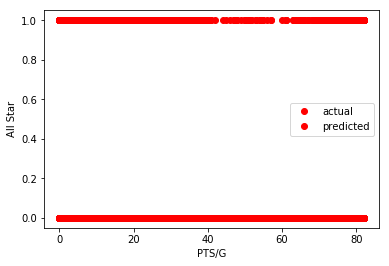

In [9]:
ytrain = np.array(pastDf['All Star'])
Xtrain = np.array(pastDf[['G', 'MPG', 'FG/G', 'FGA/G', '2P%', '3P%', 'FT%', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
                        'TS%', '3PAr', 'FTr']])
from sklearn import linear_model

regr = linear_model.LogisticRegression()
regr.fit(Xtrain, ytrain)
ytrain_pred = regr.predict(Xtrain)
plt.plot(Xtrain,ytrain, 'ro')
plt.plot(Xtrain,ytrain_pred, 'ro')
plt.legend(['actual', 'predicted'])
plt.xlabel('PTS/G')
plt.ylabel('All Star')

# Prepare Rookie Dataset for Predictions

In [56]:
# Prepare rookies dataframe to be plugged into machine learning models by skipping columns that aren't parameters in the model
rookieNames = rookieDf.iloc[:, 1]
rookieFeatures = rookieDf[['G', 'MPG', 'FG/G', 'FGA/G', '2P%', '3P%', 'FT%', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
                        'TS%', '3PAr', 'FTr']]


# Cross Validation - Hall of Fame

In [45]:
vals, y = np.unique(pastDf['Hall of Fame'].values, return_inverse=True)

xnames = pastDf.columns[9:25]
X= np.array(pastDf[xnames].values)
Xs = preprocessing.scale(X)

logreg= linear_model.LogisticRegression(C=1e5)
logreg.fit(Xs, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold = 10
kf = KFold(n_splits = nfold, shuffle=True)

rec = []
f1 = []
prec = []
err_rate = []

for Itr, Its in kf.split(Xs):
    Xtr = Xs[Itr,:]
    ytr = y [Itr]
    Xts = Xs[Its,:]
    yts = y[Its]

    logreg.fit(Xtr,ytr)
    
    yhat = logreg.predict(Xts)
    
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary')
    
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    err_rate.append(np.mean(yts!=yhat))

prec = np.mean(prec)
rec = np.mean(rec)
f1 = np.mean(f1)
err_mean= np.mean(err_rate)

print('Precision ' + str(prec))
print('Recall ' + str(rec))
print('f1 ' + str(f1))
print('error rate ' + str(err_mean))

Precision 0.275
Recall 0.09916666666666665
f1 0.13071428571428573
error rate 0.02140475563744845


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Make Prediction - Hall of Fame

In [58]:
ynew = logreg.predict(rookieFeatures)
for i in range(len(rookieFeatures)):
    print("Name = %s, Predicted = %s" % (rookieNames[i], ynew[i]))

Name = Ben Simmons, Predicted = 1
Name = Lonzo Ball, Predicted = 0
Name = Jayson Tatum, Predicted = 1
Name = Josh Jackson, Predicted = 1
Name = De'Aaron Fox, Predicted = 1
Name = Lauri Markkanen, Predicted = 1
Name = Frank Ntilikina, Predicted = 0
Name = Dennis Smith, Predicted = 1
Name = Zach Collins, Predicted = 1
Name = Malik Monk, Predicted = 1
Name = Luke Kennard, Predicted = 1
Name = Donovan Mitchell, Predicted = 1
Name = Bam Adebayo, Predicted = 1
Name = Justin Jackson, Predicted = 1
Name = T.J. Leaf, Predicted = 1
Name = John Collins, Predicted = 1
Name = Terrance Ferguson, Predicted = 1
Name = Jarrett Allen, Predicted = 1
Name = OG Anunoby, Predicted = 1
Name = Kyle Kuzma, Predicted = 1
Name = Josh Hart, Predicted = 1
Name = Wesley Iwundu, Predicted = 1
Name = Frank Mason, Predicted = 1
Name = Semi Ojeleye, Predicted = 1
Name = Jordan Bell, Predicted = 1
Name = Dwayne Bacon, Predicted = 1
Name = Tyler Dorsey, Predicted = 1
Name = Dillon Brooks, Predicted = 1
Name = Sterling Br

# Cross Validation - All Stars

In [59]:
vals, y = np.unique(pastDf['All Star'].values, return_inverse=True)

xnames = pastDf.columns[9:25]
X= np.array(pastDf[xnames].values)
Xs = preprocessing.scale(X)

logreg= linear_model.LogisticRegression(C=1e5)
logreg.fit(Xs, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [60]:
nfold = 10
kf = KFold(n_splits = nfold, shuffle=True)

rec = []
f1 = []
prec = []
err_rate = []

for Itr, Its in kf.split(Xs):
    Xtr = Xs[Itr,:]
    ytr = y [Itr]
    Xts = Xs[Its,:]
    yts = y[Its]

    logreg.fit(Xtr,ytr)
    
    yhat = logreg.predict(Xts)
    
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary')
    
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    err_rate.append(np.mean(yts!=yhat))

prec = np.mean(prec)
rec = np.mean(rec)
f1 = np.mean(f1)
err_mean= np.mean(err_rate)

print('Precision ' + str(prec))
print('Recall ' + str(rec))
print('f1 ' + str(f1))
print('error rate ' + str(err_mean))

Precision 0.6427114552114552
Recall 0.2845761950940979
f1 0.39168541010646274
error rate 0.0748910532011348


# Make Prediction - All Star

In [62]:
ynew = logreg.predict(rookieFeatures)
for i in range(len(rookieFeatures)):
    print("Name = %s, Predicted = %s" % (rookieNames[i], ynew[i]))

Name = Ben Simmons, Predicted = 1
Name = Lonzo Ball, Predicted = 1
Name = Jayson Tatum, Predicted = 1
Name = Josh Jackson, Predicted = 1
Name = De'Aaron Fox, Predicted = 1
Name = Lauri Markkanen, Predicted = 1
Name = Frank Ntilikina, Predicted = 1
Name = Dennis Smith, Predicted = 1
Name = Zach Collins, Predicted = 1
Name = Malik Monk, Predicted = 1
Name = Luke Kennard, Predicted = 1
Name = Donovan Mitchell, Predicted = 1
Name = Bam Adebayo, Predicted = 1
Name = Justin Jackson, Predicted = 1
Name = T.J. Leaf, Predicted = 1
Name = John Collins, Predicted = 1
Name = Terrance Ferguson, Predicted = 1
Name = Jarrett Allen, Predicted = 1
Name = OG Anunoby, Predicted = 1
Name = Kyle Kuzma, Predicted = 1
Name = Josh Hart, Predicted = 1
Name = Wesley Iwundu, Predicted = 1
Name = Frank Mason, Predicted = 1
Name = Semi Ojeleye, Predicted = 1
Name = Jordan Bell, Predicted = 1
Name = Dwayne Bacon, Predicted = 1
Name = Tyler Dorsey, Predicted = 1
Name = Dillon Brooks, Predicted = 1
Name = Sterling Br

# Creating data splits for HOF models

In [63]:
trainData, testData = train_test_split(pastDf, test_size = 0.25, random_state = 0)

xtrainData = trainData[['G', 'MPG', 'FG/G', 'FGA/G', '2P%', '3P%', 'FT%', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
                'TS%', '3PAr', 'FTr']]
 
xtestData = testData[['G', 'MPG', 'FG/G', 'FGA/G', '2P%', '3P%', 'FT%', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
              'TS%', '3PAr', 'FTr']]

ytrainData = trainData[['Hall of Fame']]


ytestData = testData[['Hall of Fame']]

# Create models and confusion matrices for HOF models

In [66]:
svcModel = SVC(kernel='rbf', gamma=1e-4, C=10, probability = True)

svcModel.fit(xtrainData, ytrainData.values.ravel())

ysvc = svcModel.predict(xtestData)


probability = svcModel.predict_proba(xtestData)

posProbability = probability[:, 1]


fprSVC, tprSVC, thresholdSVC = metrics.roc_curve(ytestData, posProbability)
roc_aucSVC = metrics.auc(fprSVC, tprSVC)

cvScoreSVC = cross_val_score(svcModel, xtestData, ytestData.values.ravel(), cv = 3, scoring = 'accuracy')

print("Accuracy score: %.3f" % metrics.accuracy_score(ytestData, ysvc))
print("Log loss: %.3f" % metrics.log_loss(ytestData, probability))
print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytestData, posProbability))
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreSVC.mean(), cvScoreSVC.std() * 2))

Accuracy score: 0.983
Log loss: 0.075
Area under ROC curve: 0.951
Accuracy (cross validation score): 0.98 (+/- 0.00)


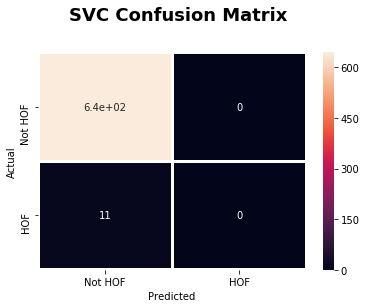

In [68]:
confusionmatrix = metrics.confusion_matrix(ytestData, ysvc)

svcHofconfusionmatrix, ax = plt.subplots()

sns.heatmap(confusionmatrix, annot=True, ax = ax, linewidth = 2)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

labels = ["Not HOF", "HOF"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

svcHofconfusionmatrix.suptitle("SVC Confusion Matrix", weight = 'bold', size = 18, y = 1.04, x = .45)

svcHofconfusionmatrix.savefig('svc-hof-cm.png', dpi = 400, bbox_inches = 'tight')

In [69]:
deepneuralnet = MLPClassifier(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    shuffle=False,
    random_state=0,
    activation='identity')

deepneuralnet.fit(xtrainData, ytrainData.values.ravel())

y_deepneuralnet = deepneuralnet.predict(xtestData)

print("Accuracy score: %.3f" % metrics.accuracy_score(ytestData, y_deepneuralnet))

proba = deepneuralnet.predict_proba(xtestData)
print("Log loss: %.3f" % metrics.log_loss(ytestData, proba))

posProb = proba[:, 1]
print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytestData, posProb))

fprDNN, tprDNN, thresholdDNN = metrics.roc_curve(ytestData, posProb)
roc_aucDNN = metrics.auc(fprDNN, tprDNN)

cvScoreDNN = cross_val_score(deepneuralnet, xtestData, ytestData.values.ravel(), cv = 3, scoring = 'accuracy')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreDNN.mean(), cvScoreDNN.std() * 2))

Accuracy score: 0.988
Log loss: 0.045
Area under ROC curve: 0.971
Accuracy (cross validation score): 0.98 (+/- 0.00)


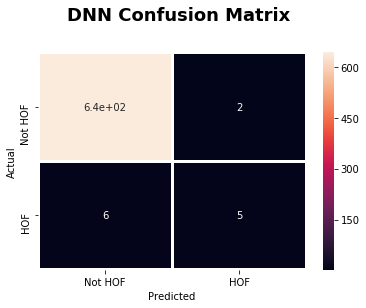

In [71]:
confusionmatrix = metrics.confusion_matrix(ytestData, y_deepneuralnet)

deepneuralnetHofCM, ax = plt.subplots()

sns.heatmap(confusionmatrix, annot=True, ax = ax, linewidth = 2)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

labels = ["Not HOF", "HOF"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

deepneuralnetHofCM.suptitle("DNN Confusion Matrix", weight = 'bold', size = 18, y = 1.04, x = .45)

deepneuralnetHofCM.savefig('dnn-hof-cm.png', dpi = 400, bbox_inches = 'tight')

# Randomized search CV

In [73]:
# SVC

C = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]

kernel = ['rbf', 'linear']

gamma = [float(x) for x in np.linspace(start = 1e-5, stop = 10, num = 10)]

random_grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma}

svc_random = RandomizedSearchCV(estimator = svcModel, param_distributions = random_grid, n_iter = 25, cv = 3, 
                                verbose=2, random_state=42, n_jobs = 20)

In [74]:
svc_random.fit(xtrainData, ytrainData.values.ravel())

y_svcrand = svc_random.predict(xtestData)

searchScore = metrics.accuracy_score(ytestData, y_svcrand)
nonSearchScore = metrics.accuracy_score(ytestData, y_svc)
improvement = (searchScore - nonSearchScore) / nonSearchScore

print("Percent improvement: %.5f" % improvement)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=linear, gamma=7.77778, C=45 ..............................
[CV] kernel=linear, gamma=7.77778, C=45 ..............................
[CV] kernel=linear, gamma=7.77778, C=45 ..............................
[CV] kernel=linear, gamma=7.77778, C=1 ...............................
[CV] kernel=linear, gamma=7.77778, C=1 ...............................
[CV] kernel=linear, gamma=7.77778, C=1 ...............................
[CV] kernel=rbf, gamma=5.55556, C=12 .................................
[CV] kernel=rbf, gamma=5.55556, C=12 .................................
[CV] kernel=rbf, gamma=5.55556, C=12 .................................
[CV] kernel=rbf, gamma=10.0, C=78 ....................................
[CV] kernel=rbf, gamma=10.0, C=78 ....................................
[CV] kernel=rbf, gamma=10.0, C=78 ....................................
[CV] kernel=rbf, gamma=4.44445, C=67 .................................
[CV] kernel=rbf,

[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    3.5s


[CV] .................. kernel=rbf, gamma=5.55556, C=12, total=   3.3s
[CV] kernel=rbf, gamma=5.55556, C=89 .................................
[CV] .................. kernel=rbf, gamma=5.55556, C=12, total=   3.3s
[CV] .................. kernel=rbf, gamma=4.44445, C=67, total=   3.3s
[CV] .................. kernel=rbf, gamma=5.55556, C=12, total=   3.4s
[CV] kernel=rbf, gamma=7.77778, C=89 .................................
[CV] kernel=rbf, gamma=7.77778, C=89 .................................
[CV] kernel=rbf, gamma=7.77778, C=89 .................................
[CV] .................. kernel=rbf, gamma=4.44445, C=67, total=   3.3s
[CV] kernel=linear, gamma=2.22223, C=23 ..............................
[CV] .................. kernel=rbf, gamma=4.44445, C=67, total=   3.3s
[CV] kernel=linear, gamma=2.22223, C=23 ..............................
[CV] .................. kernel=rbf, gamma=5.55556, C=89, total=   3.0s
[CV] kernel=linear, gamma=2.22223, C=23 ..............................
[CV] .

[CV] ............... kernel=linear, gamma=7.77778, C=45, total= 4.9min
[CV] ............... kernel=linear, gamma=7.77778, C=56, total= 5.0min
[CV] ............... kernel=linear, gamma=2.22223, C=34, total= 1.9min
[CV] ............... kernel=linear, gamma=2.22223, C=89, total= 4.8min
[CV] ............... kernel=linear, gamma=6.66667, C=45, total= 3.7min
[CV] ............... kernel=linear, gamma=7.77778, C=56, total= 5.0min
[CV] ............... kernel=linear, gamma=8.88889, C=89, total= 4.7min
[CV] ............... kernel=linear, gamma=2.22223, C=89, total= 5.0min


[Parallel(n_jobs=20)]: Done  75 out of  75 | elapsed:  5.1min finished


NameError: name 'y_svc' is not defined

In [ ]:
# DNN

hidden_layers = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]

activation = ['identity', 'logistic', 'relu', 'tanh']

solver = ['lbfgs', 'adam', 'sgd']

random_grid = {'hidden_layers': hidden_layers,
               'activation': activation,
               'solver': solver}

dnn_random = RandomizedSearchCV(estimator = dnn, param_distributions = random_grid, n_iter = 20, cv = 3, 
                               verbose=2, random_state=42, n_jobs = 20)

# ROC curves for HOF

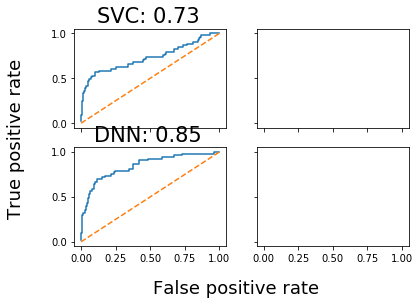

In [61]:

rocHOF, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True, sharex = True)

ax1.plot(fprSVC, tprSVC, label = 'ROC curve')
ax1.plot([0, 1], [0, 1], linestyle = '--', label = 'Reference line')
ax1.set_title("SVC: %.2f" % roc_aucSVC, size = 21, x = .485, ha = 'center')

ax3.plot(fprDNN, tprDNN)
ax3.plot([0, 1], [0, 1], linestyle = '--')
ax3.set_title("DNN: %.2f" % roc_aucDNN, size = 21, x = .485, ha = 'center')

rocHOF.text(-0.03, 0.5, "True positive rate", va='center', rotation='vertical', size = 18)
rocHOF.text(0.5, -0.04, "False positive rate", ha = 'center', size = 18)

rocHOF.savefig('roc-hof.png', dpi = 400, bbox_inches = 'tight')

# Predict rookies

In [37]:
svcPred = svc.predict(rookieFeatures)

for i, j in zip(svcPred, rookieNames):
    print(i, j)

0 Ben Simmons
0 Lonzo Ball
0 Jayson Tatum
0 Josh Jackson
0 De'Aaron Fox
0 Lauri Markkanen
0 Frank Ntilikina
0 Dennis Smith
0 Zach Collins
0 Malik Monk
0 Luke Kennard
0 Donovan Mitchell
0 Bam Adebayo
0 Justin Jackson
0 T.J. Leaf
0 John Collins
0 Terrance Ferguson
0 Jarrett Allen
0 OG Anunoby
0 Kyle Kuzma
0 Josh Hart
0 Wesley Iwundu
0 Frank Mason
0 Semi Ojeleye
0 Jordan Bell
0 Dwayne Bacon
0 Tyler Dorsey
0 Dillon Brooks
0 Sterling Brown
0 Sindarius Thornwell


In [39]:
dnnPred = dnn.predict(rookieFeatures)

for i, j in zip(dnnPred, rookieNames):
    print(i, j)

0 Ben Simmons
0 Lonzo Ball
0 Jayson Tatum
0 Josh Jackson
0 De'Aaron Fox
0 Lauri Markkanen
0 Frank Ntilikina
0 Dennis Smith
0 Zach Collins
0 Malik Monk
0 Luke Kennard
0 Donovan Mitchell
0 Bam Adebayo
0 Justin Jackson
0 T.J. Leaf
0 John Collins
0 Terrance Ferguson
0 Jarrett Allen
0 OG Anunoby
0 Kyle Kuzma
0 Josh Hart
0 Wesley Iwundu
0 Frank Mason
0 Semi Ojeleye
0 Jordan Bell
0 Dwayne Bacon
0 Tyler Dorsey
0 Dillon Brooks
0 Sterling Brown
0 Sindarius Thornwell


# Create data splits for All Star models

In [40]:
trainData, testData = train_test_split(pastDf, test_size = 0.25, random_state = 0)

xtrainData = trainData[['G', 'MPG', 'FG/G', 'FGA/G', '2P%', '3P%', 'FT%', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
                'TS%', '3PAr', 'FTr']]
ytrainData = trainData[['All Star']]
 
xtestData = testData[['G', 'MPG', 'FG/G', 'FGA/G', '2P%', '3P%', 'FT%', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G',
              'TS%', '3PAr', 'FTr']]
ytestData = testData[['All Star']]

# Create models and confusion matrices for All Star models

In [71]:
svcModel = SVC(kernel='rbf', gamma=1e-4, C=100, probability = True)
svcModel.fit(xtrainData, ytrainData.values.ravel())

Ysvc = svcModel.predict(xtestData)

print("Accuracy score: %.3f" % metrics.accuracy_score(ytestData, Ysvc))

proba = svc.predict_proba(xtestData)
print("Log loss: %.3f" % metrics.log_loss(ytestData, proba))

posProb = proba[:, 1]
print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytestData, posProb))

fprSVC, tprSVC, thresholdSVC = metrics.roc_curve(ytestData, posProb)
roc_aucSVC = metrics.auc(fprSVC, tprSVC)

cvScoreSVC = cross_val_score(svcModel, xtestData, ytestData.values.ravel(), cv = 3, scoring = 'accuracy')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreSVC.mean(), cvScoreSVC.std() * 2))

Accuracy score: 0.927
Log loss: 0.231
Area under ROC curve: 0.729
Accuracy (cross validation score): 0.92 (+/- 0.00)


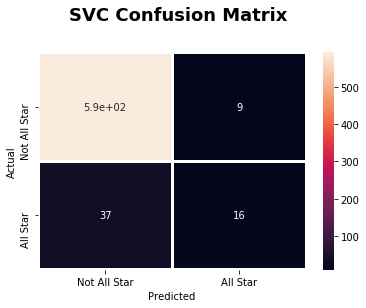

In [72]:
cconfusionmatrix = metrics.confusion_matrix(ytestData, y_svc)
svcHofAS, ax = plt.subplots()

sns.heatmap(confusionmatrix, annot=True, ax = ax, linewidth = 2)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

labels = ["Not All Star", "All Star"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

svcHofAS.suptitle("SVC Confusion Matrix", weight = 'bold', size = 18, y = 1.04, x = .45)

svcHofAS.savefig('svc-hof-as.png', dpi = 400, bbox_inches = 'tight')

In [46]:
dnn = MLPClassifier(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    shuffle=False,
    random_state=0,
    activation='identity')

dnn.fit(xtrainData, ytrainData.values.ravel())

y_dnn = dnn.predict(xtestData)

print("Accuracy score: %.3f" % metrics.accuracy_score(ytestData, y_dnn))

proba = dnn.predict_proba(xtestData)
print("Log loss: %.3f" % metrics.log_loss(ytestData, proba))

posProb = proba[:, 1]
print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytestData, posProb))

fprDNN, tprDNN, thresholdDNN = metrics.roc_curve(ytestData, posProb)
roc_aucDNN = metrics.auc(fprDNN, tprDNN)

cvScoreDNN = cross_val_score(dnn, xtestData, ytestData.values.ravel(), cv = 3, scoring = 'accuracy')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreDNN.mean(), cvScoreDNN.std() * 2))

Accuracy score: 0.930
Log loss: 0.208
Area under ROC curve: 0.846
Accuracy (cross validation score): 0.93 (+/- 0.01)


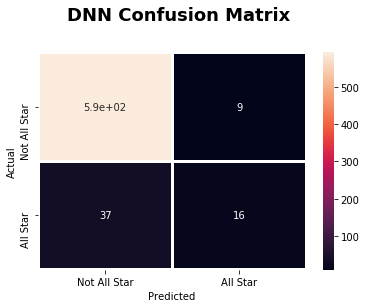

In [73]:
confusionmatrix = metrics.confusion_matrix(ytestData, y_dnn)

dnnHofAS, ax = plt.subplots()

sns.heatmap(confusionmatrix, annot=True, ax = ax, linewidth = 2)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

labels = ["Not All Star", "All Star"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

dnnHofAS.suptitle("DNN Confusion Matrix", weight = 'bold', size = 18, y = 1.04, x = .45)

dnnHofAS.savefig('dnn-hof-as.png', dpi = 400, bbox_inches = 'tight')

# Randomized search CV

In [48]:
# SVC

C = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]

kernel = ['rbf', 'linear']

gamma = [float(x) for x in np.linspace(start = 1e-5, stop = 10, num = 10)]

random_grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma}

svc_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 25, cv = 3, 
                                verbose=2, random_state=42, n_jobs = 20)

In [49]:
svc_random.fit(xtrainData, ytrainData.values.ravel())

y_svcrand = svc_random.predict(xtestData)

searchScore = metrics.accuracy_score(ytestData, y_svcrand)
nonSearchScore = metrics.accuracy_score(ytestData, y_svc)
improvement = (searchScore - nonSearchScore) / nonSearchScore

print("Percent improvement: %.5f" % improvement)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=linear, gamma=7.77778, C=45 ..............................
[CV] kernel=linear, gamma=7.77778, C=45 ..............................
[CV] kernel=linear, gamma=7.77778, C=45 ..............................
[CV] kernel=linear, gamma=7.77778, C=1 ...............................
[CV] kernel=linear, gamma=7.77778, C=1 ...............................
[CV] kernel=linear, gamma=7.77778, C=1 ...............................
[CV] kernel=rbf, gamma=5.55556, C=12 .................................
[CV] kernel=rbf, gamma=5.55556, C=12 .................................
[CV] kernel=rbf, gamma=5.55556, C=12 .................................
[CV] kernel=rbf, gamma=10.0, C=78 ....................................
[CV] kernel=rbf, gamma=10.0, C=78 ....................................
[CV] kernel=rbf, gamma=10.0, C=78 ....................................
[CV] kernel=rbf, gamma=4.44445, C=67 .................................
[CV] kernel=rbf,

[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    3.6s


[CV] kernel=rbf, gamma=7.77778, C=89 .................................
[CV] kernel=rbf, gamma=7.77778, C=89 .................................
[CV] kernel=rbf, gamma=5.55556, C=89 .................................
[CV] .................. kernel=rbf, gamma=5.55556, C=12, total=   3.4s
[CV] kernel=rbf, gamma=7.77778, C=89 .................................
[CV] .................. kernel=rbf, gamma=4.44445, C=67, total=   3.4s
[CV] kernel=linear, gamma=2.22223, C=23 ..............................
[CV] .................. kernel=rbf, gamma=4.44445, C=67, total=   3.5s
[CV] kernel=linear, gamma=2.22223, C=23 ..............................
[CV] .................. kernel=rbf, gamma=7.77778, C=89, total=   3.1s
[CV] kernel=linear, gamma=2.22223, C=23 ..............................
[CV] .................. kernel=rbf, gamma=5.55556, C=89, total=   3.3s
[CV] kernel=rbf, gamma=3.33334, C=34 .................................
[CV] .................. kernel=rbf, gamma=7.77778, C=89, total=   3.2s
[CV] k

[CV] ............... kernel=linear, gamma=2.22223, C=34, total= 3.9min
[CV] ............... kernel=linear, gamma=7.77778, C=56, total= 7.8min
[CV] ............... kernel=linear, gamma=8.88889, C=89, total= 7.6min
[CV] ............... kernel=linear, gamma=2.22223, C=89, total= 8.0min
[CV] ............... kernel=linear, gamma=8.88889, C=89, total= 7.9min


[Parallel(n_jobs=20)]: Done  75 out of  75 | elapsed:  8.2min finished


Percent improvement: 0.00000


In [52]:
# DNN

hidden_layers = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]

activation = ['identity', 'logistic', 'relu', 'tanh']

solver = ['lbfgs', 'adam', 'sgd']

random_grid = {'hidden_layers': hidden_layers,
               'activation': activation,
               'solver': solver}

dnn_random = RandomizedSearchCV(estimator = dnn, param_distributions = random_grid, n_iter = 25, cv = 3, 
                               verbose=2, random_state=42, n_jobs = 20)

# ROC curves for All Star

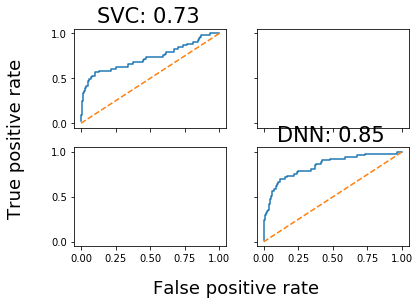

In [74]:
rocAS, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True, sharex = True)

ax1.plot(fprSVC, tprSVC, label = 'ROC curve')
ax1.plot([0, 1], [0, 1], linestyle = '--', label = 'Reference line')
ax1.set_title("SVC: %.2f" % roc_aucSVC, size = 21, x = .485, ha = 'center')

ax4.plot(fprDNN, tprDNN)
ax4.plot([0, 1], [0, 1], linestyle = '--')
ax4.set_title("DNN: %.2f" % roc_aucDNN, size = 21, x = .485, ha = 'center')

rocAS.text(-0.03, 0.5, "True positive rate", va='center', rotation='vertical', size = 18)
rocAS.text(0.5, -0.04, "False positive rate", ha = 'center', size = 18)

rocAS.savefig('roc-as.png', dpi = 400, bbox_inches = 'tight')

# Predict rookies 

In [56]:
svcPred = svc.predict(rookieFeatures)

for i, j in zip(svcPred, rookieNames):
    print(i, j)

1 Ben Simmons
0 Lonzo Ball
0 Jayson Tatum
0 Josh Jackson
0 De'Aaron Fox
0 Lauri Markkanen
0 Frank Ntilikina
0 Dennis Smith
0 Zach Collins
0 Malik Monk
0 Luke Kennard
0 Donovan Mitchell
0 Bam Adebayo
0 Justin Jackson
0 T.J. Leaf
0 John Collins
0 Terrance Ferguson
0 Jarrett Allen
0 OG Anunoby
0 Kyle Kuzma
0 Josh Hart
0 Wesley Iwundu
0 Frank Mason
0 Semi Ojeleye
0 Jordan Bell
0 Dwayne Bacon
0 Tyler Dorsey
0 Dillon Brooks
0 Sterling Brown
0 Sindarius Thornwell


In [58]:
dnnPred = dnn.predict(rookieFeatures)

for i, j in zip(dnnPred, rookieNames):
    print(i, j)

1 Ben Simmons
0 Lonzo Ball
0 Jayson Tatum
0 Josh Jackson
0 De'Aaron Fox
0 Lauri Markkanen
0 Frank Ntilikina
0 Dennis Smith
0 Zach Collins
0 Malik Monk
0 Luke Kennard
1 Donovan Mitchell
0 Bam Adebayo
0 Justin Jackson
0 T.J. Leaf
0 John Collins
0 Terrance Ferguson
0 Jarrett Allen
0 OG Anunoby
0 Kyle Kuzma
0 Josh Hart
0 Wesley Iwundu
0 Frank Mason
0 Semi Ojeleye
0 Jordan Bell
0 Dwayne Bacon
0 Tyler Dorsey
0 Dillon Brooks
0 Sterling Brown
0 Sindarius Thornwell
